# 회귀분석 (Regression Analysis)

In [7]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import matplotlib as plt
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [9]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("../resource/W5/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다. 
# 각 항목별 min과 max 값을 살펴 보자. bedrooms의 max 33은 이상치가 아닌지 확인 필요

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


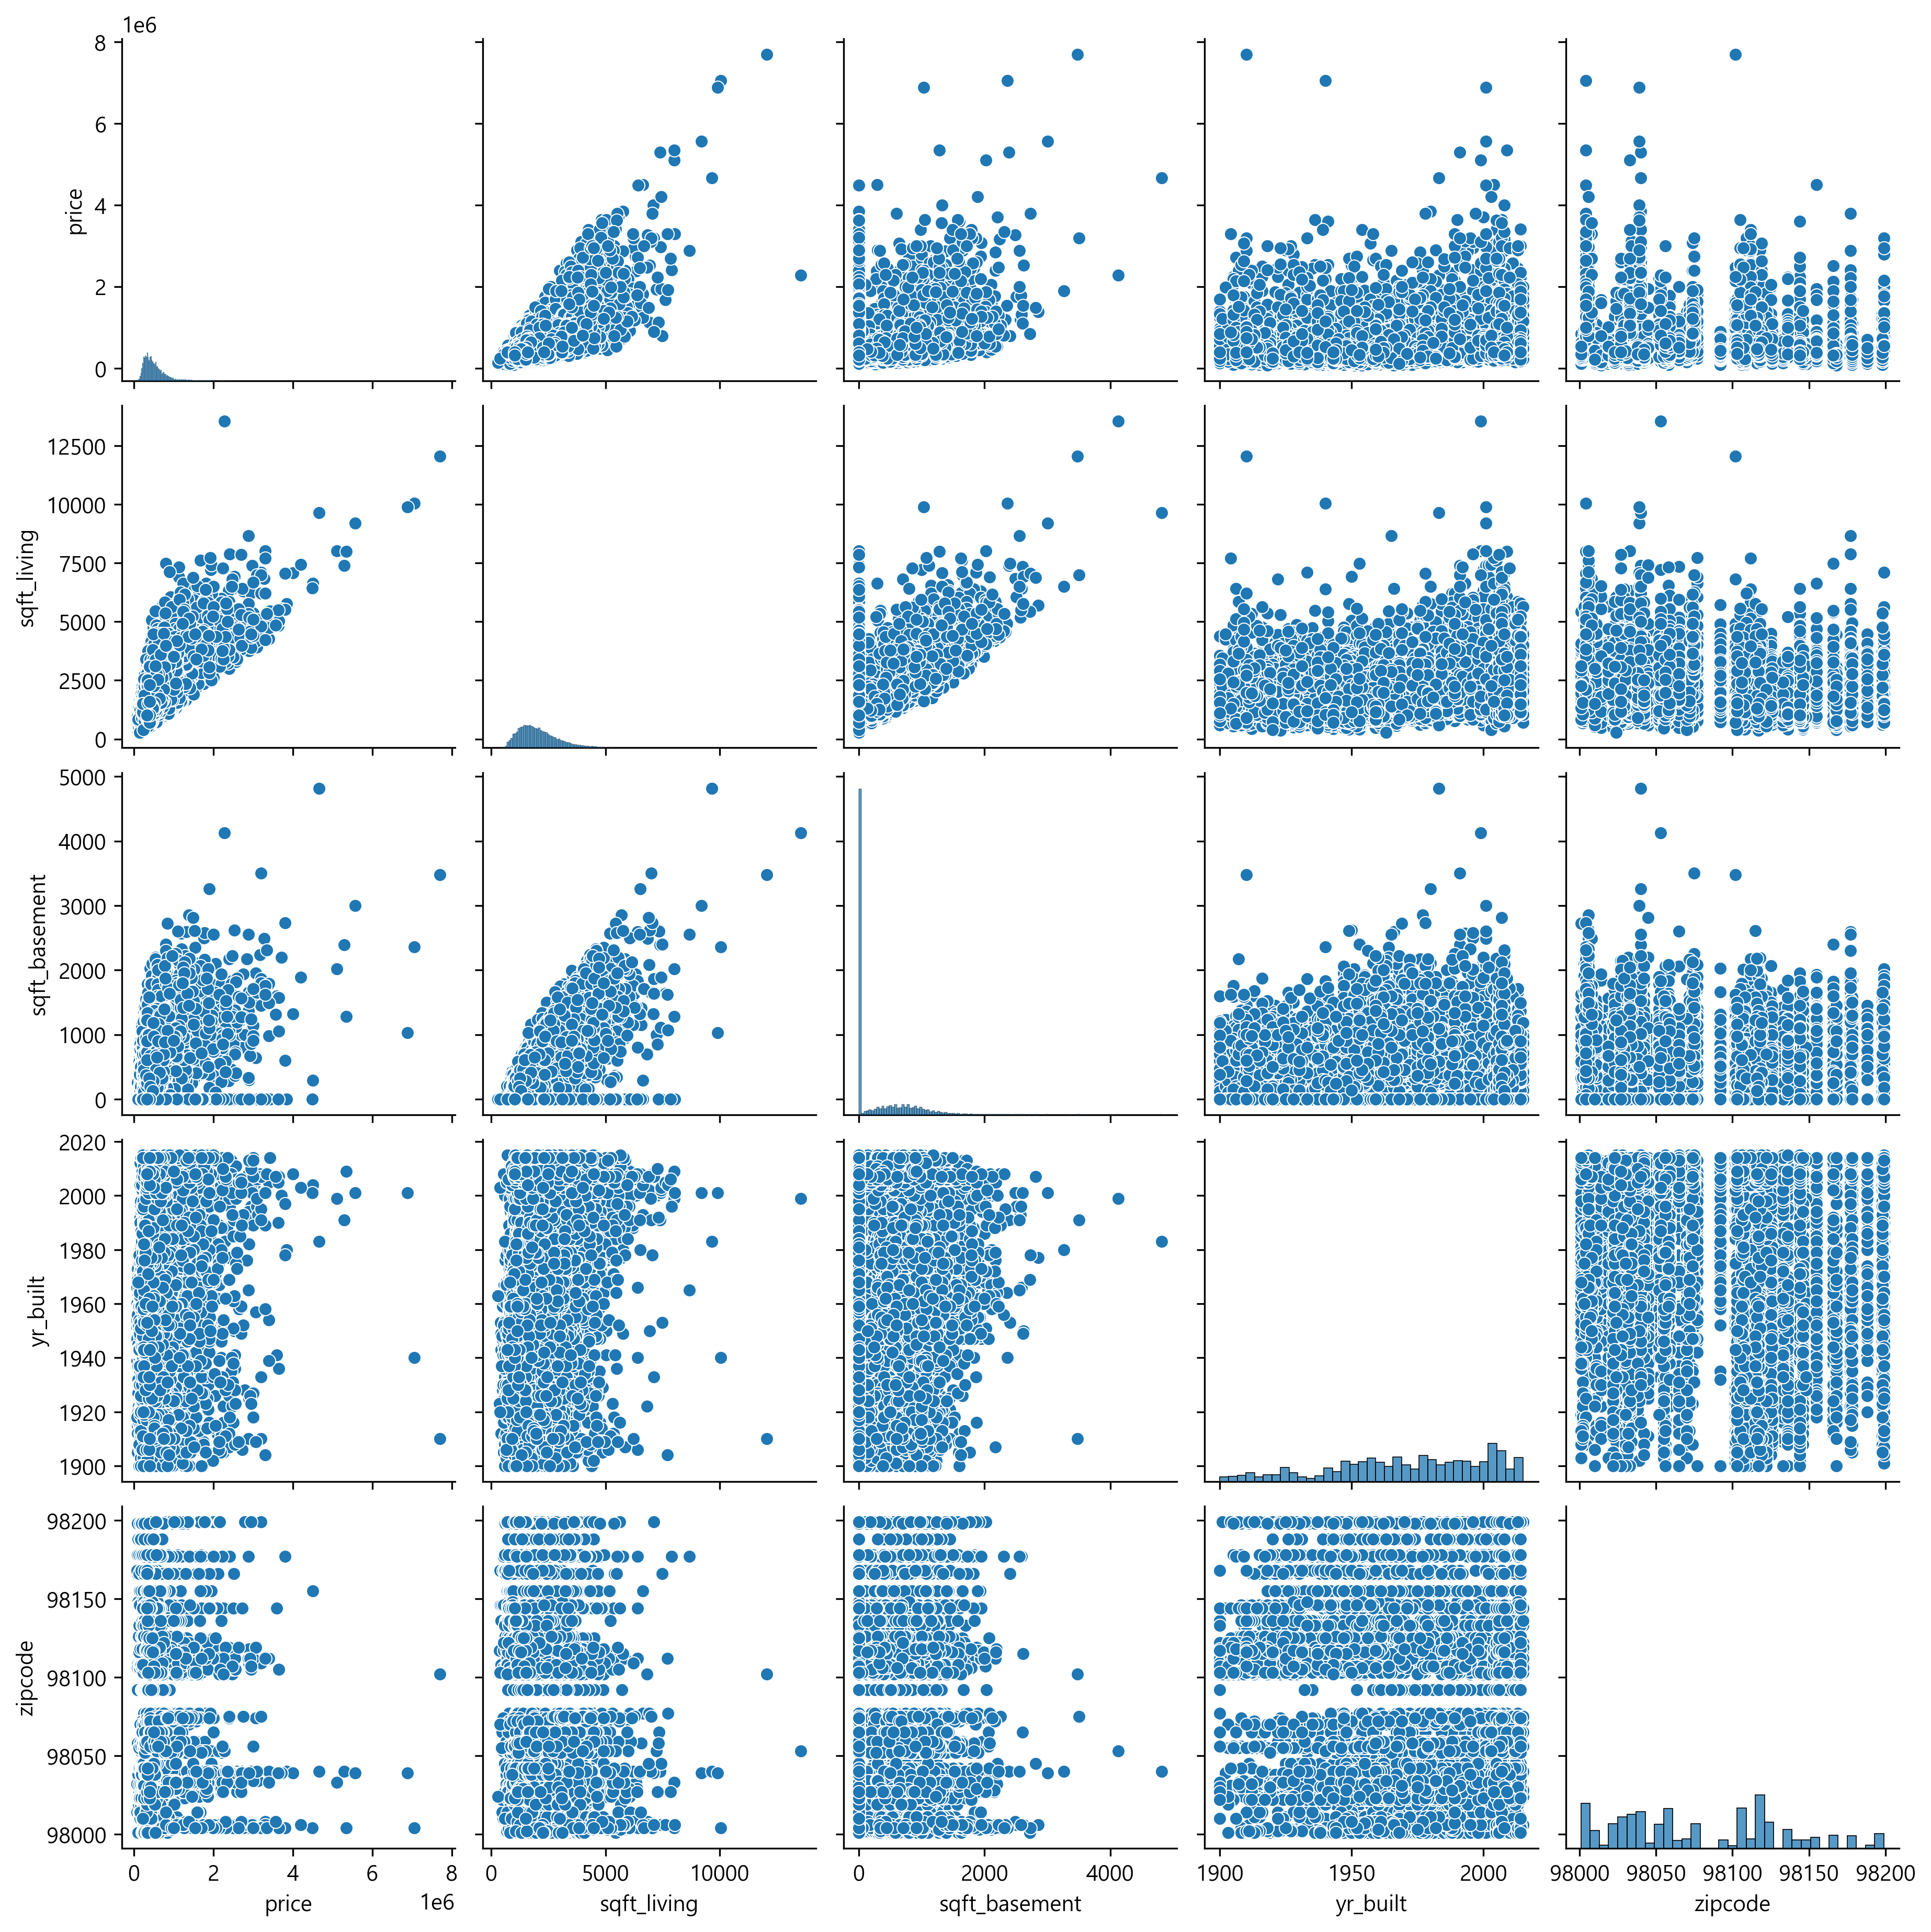

In [12]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

- price와 soft_living, soft_basement는 상관성이 커 보임. 
- price와 yr_built 도 약간의 상관성이 보임.
- soft_living과 soft_basement는 특히 높은 상관관계가 보여 다중공선성이 있어 보임.

In [13]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1. 다중 선형회귀모델 예측

In [14]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [15]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  15129
test data 개수:  6484


##### - 다중회귀모델 생성 및 학습

In [16]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [17]:
print(x_train.shape)
print(x_test.shape)

(15129, 18)
(6484, 18)


In [18]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

#### - 다중 선형회귀 모델 예측 결과검토

In [19]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.69


- 학습셋 0.7 정도면 준수한 수준
- 학습셋과 테스트셋의 결과의 차이가 별로 없다는 것 -> 과적합되지 않았다는 것 확인

In [20]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'MSE = {mse:.3f}, RMSE = {rmse:.3f}')

MSE = 42406666661.607, RMSE = 205928.790


In [21]:
np.set_printoptions(suppress=True)

# 모델의 상수값 확인
print(f'y 절편값 = {mreg.intercept_}')

# 모델의 회귀계수 확인
# print('회귀계수값 = ', np.round(mreg.coef_ , 2))
print(f'회귀계수값 = {np.round(mreg.coef_ , 1)}')
print(mreg.coef_.shape)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다. 
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

y 절편값 = [8750936.9882748]
회귀계수값 = [[ -36617.2   38962.1     112.3       0.1    9886.9  554196.7   54973.4
    27620.3   95269.9      67.5      44.8   -2650.       19.3    -593.8
   596674.  -209845.8      25.7      -0.4]]
(1, 18)


In [22]:
coef = pd.Series(data=np.round(mreg.coef_[0], 2), index=x.columns)
coef.sort_values(ascending = False)

lat              596674.03
waterfront       554196.70
grade             95269.93
view              54973.39
bathrooms         38962.06
condition         27620.27
floors             9886.86
sqft_living         112.34
sqft_above           67.53
sqft_basement        44.81
sqft_living15        25.73
yr_renovated         19.29
sqft_lot              0.13
sqft_lot15           -0.42
zipcode            -593.84
yr_built          -2650.04
bedrooms         -36617.18
long            -209845.79
dtype: float64

#### - 자세한 모델 결과치 확인: statsmodel 패키지의 ols 사용

##### 

- 상수항 결합 : sm.add_const() 사용하는 이유

    - statsmodels 패키지 사용시 수동으로 상수항 결합해줘야 함.
    - scikitlearn 패키지 사용시는 자동으로 상수항 결합됨.

In [23]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12551,2,1.00,790,2640,1.0,0,0,3,7,790,0,1973,0,98034,47.7351,-122.178,1310,2064
16223,5,2.25,2350,13000,1.0,0,0,3,7,2350,0,1961,0,98178,47.4939,-122.256,1570,11440
20832,3,3.00,1730,1442,2.0,0,0,3,8,1440,290,2008,0,98106,47.5344,-122.348,1370,1524
21462,3,2.75,1320,1125,3.0,0,0,3,8,1320,0,2008,0,98103,47.6598,-122.348,1320,1266
14104,3,2.50,2100,12338,2.0,0,0,3,9,2100,0,1997,0,98072,47.7412,-122.168,2320,6257


In [24]:
xx = sm.add_constant(x_train)
xx.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12551,1.0,2,1.00,790,2640,1.0,0,0,3,7,790,0,1973,0,98034,47.7351,-122.178,1310,2064
16223,1.0,5,2.25,2350,13000,1.0,0,0,3,7,2350,0,1961,0,98178,47.4939,-122.256,1570,11440
20832,1.0,3,3.00,1730,1442,2.0,0,0,3,8,1440,290,2008,0,98106,47.5344,-122.348,1370,1524
21462,1.0,3,2.75,1320,1125,3.0,0,0,3,8,1320,0,2008,0,98103,47.6598,-122.348,1320,1266
14104,1.0,3,2.50,2100,12338,2.0,0,0,3,9,2100,0,1997,0,98072,47.7412,-122.168,2320,6257


In [25]:
xx.describe()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15129.0,15129.000000,15129.000000,15129.000000,1.512900e+04,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000
mean,1.0,3.373587,2.115755,2080.421971,1.550803e+04,1.494415,0.007800,0.238284,3.408685,7.660123,1788.734682,291.687289,1971.083614,83.249256,98078.261352,47.559826,-122.214175,1983.712208,13047.185670
std,0.0,0.905375,0.769805,913.589236,4.346705e+04,0.540914,0.087973,0.773708,0.651550,1.173656,825.728205,442.180061,29.415614,399.068631,53.566442,0.138514,0.140646,684.957035,28831.920071
min,1.0,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,1.0,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470500,-122.328000,1480.000000,5100.000000
50%,1.0,3.000000,2.250000,1910.000000,7.585000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1830.000000,7620.000000
75%,1.0,4.000000,2.500000,2560.000000,1.072200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677600,-122.125000,2360.000000,10098.000000
max,1.0,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


#### - 상수항 추가된 값을 이용한 ols 함수 호출

In [26]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2118.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:43:33   Log-Likelihood:            -2.0607e+05
No. Observations:               15129   AIC:                         4.122e+05
Df Residuals:                   15111   BIC:                         4.123e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.751e+06   3.47e+06      2.519      0.012    1.94e+06    1.56e+07
bedrooms      -3.662e+04   2336.144    -15.674      0.000   -4.12e+04    -3.2e+04
bathrooms      3.896e+04   3872.894     10.060      0.000    3.14e+04    4.66e+04
sqft_living     112.3407      2.728     41.179      0.000     106.993     117.688
sqft_lot          0.1289      0.053      2.416      0.016       0.024       0.233
floors         9886.8566   4262.448      2.320      0.020    1531.943    1.82e+04
waterfront     5.542e+05   2.03e+04     27.345      0.000    5.14e+05    5.94e+05
view           5.497e+04   2516.914     21.842      0.000       5e+04    5.99e+04
condition      2.762e+04   2779.774      9.936      0.000    2.22e+04    3.31e+04
grade          9.527e+04   2562.567     37.178      0.000    9.02e+04       1e+05
sqft_above       67.5327      2.675     25.247      0.000      62.290      72.776
sqft_basement    44.8126      3.155     14.206      0.000      38.629      50.996
yr_built      -2650.0354     85.782    -30.893      0.000   -2818.179   -2481.891
yr_renovated     19.2945      4.359      4.427      0.000      10.751      27.838
zipcode        -593.8370     39.011    -15.222      0.000    -670.304    -517.370
lat            5.967e+05   1.27e+04     46.920      0.000    5.72e+05    6.22e+05
long          -2.098e+05   1.56e+04    -13.433      0.000    -2.4e+05   -1.79e+05
sqft_living15    25.7264      4.041      6.366      0.000      17.805      33.648
sqft_lot15       -0.4223      0.081     -5.210      0.000      -0.581      -0.263
==============================================================================
Omnibus:                    12993.103   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1436868.673
Skew:                           3.589   Prob(JB):                         0.00
Kurtosis:                      50.200   Cond. No.                     4.79e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.7e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 다중공선성 문제가 있음을 알려줌 -> 상관관계가 높은 변수 제거 혹은 가공 절차 필요성 보여줌

## 2. 다항 회귀모델 예측

In [27]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False) # degree=2 독립변수를 2차항으로 변환하겠다는 의미
                                                          # include_bias 기본값=True, 편향을 위한 변수 X0 추가. 다항식의 모든 거듭제곱이 0이면 True로 추가
# 다항 변수 변환 동작 확인을 위한 테스트 코드 (2차항)
x_demo = [[1, 2, 3],[10, 20, 30], [100, 200, 300]] #[[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]]
x_demo_poly = poly_m.fit_transform(x_demo)         #[[x1, y1, z1, x1x1, x1y1, x1z1, y1y1, y1z1, z1z1], [x2, y2, z2, x2x2, x2y2, x2z2, y2y2, y2z2, z2z2], [x3, y3, z3, x3x3, x3y3, x3z3, y3y3, y3z3, z3z3]]
print(x_demo)
print(x_demo_poly)

# x_train 데이터에 대한 다항 변수 변환
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]
[[    1.     2.     3.     1.     2.     3.     4.     6.     9.]
 [   10.    20.    30.   100.   200.   300.   400.   600.   900.]
 [  100.   200.   300. 10000. 20000. 30000. 40000. 60000. 90000.]]


In [28]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)
print(mreg_poly.coef_.shape)

[1.68187732e+10]
[[ 12102029.12609289  -7477875.05043238      5461.82443707
       -389.54534118 -41380466.20939858  80221072.23560604
    4731101.50172196    209051.35257846 -14211112.82294088
      26222.01460314    -27634.68806591   -108736.65404057
      36520.2233706    -400881.28910536  88462660.38823245
  -14685305.97303743     -4643.61589736       703.82904699
       1203.61302743       408.36000562       -39.39562244
         -0.02787883     28256.25746907      6277.39876263
       5025.57330748     -1827.64503224      1799.34179022
          8.02330355        18.59061007      -131.48182265
        -26.30352093       -29.32675097     -3856.80351988
      71940.95960862         4.81068479         0.18605065
      -9042.31011299        29.50937667        -0.35142152
     -31554.55726291     60269.13523082      8179.16490729
      -9890.08635421     -1217.95265246        14.87883845
         14.13744023       466.56424796        -1.47270069
        -27.88217709     65052.10059948

#### - 다항 회귀모델 예측 결과 검토

In [29]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.83
테스트셋 R-Square: 0.81


- 학습셋에 대한 R2 값이 0.83 으로 매우 좋은 수준
- 학습셋에 대한 R2와 테스트셋에 대한 R2 값이 큰 차이 없음 -> 과적합 문제 없음
- 독립변수와 종속변수는 비선형적인 관계

In [30]:
mse = mean_squared_error(y_test, y_predict_poly)
rmse = np.sqrt(mse)

print(f'MSE = {mse:.3f}, RMSE = {rmse:.3f}')

MSE = 25818999534.287, RMSE = 160682.916
